In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [99]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [47]:
cd yolov5

C:\Users\IamSh\Desktop\shashank\python ML\yolov5


In [ ]:
!pip install -r requirements.txt 

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [63]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\IamSh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-21 Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [64]:
img='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsi7yDfuWMuLXjzBldYrGcATdVNDdA_k6sQKd-DzjiKJ0TjEu6qCa3KeLXURpDhsDXESY&usqp=CAU'
res=model(img)
res.print()

image 1/1: 168x300 1 person, 1 cup, 2 potted plants, 1 tv, 1 laptop, 1 mouse, 1 book
Speed: 258.3ms pre-process, 62.5ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


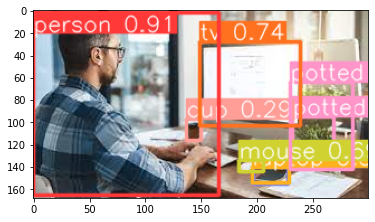

In [65]:
%matplotlib inline 
plt.imshow(np.squeeze(res.render()))
plt.show()

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('x'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
import uuid   # Unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(3)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [90]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\IamSh/.cache\torch\hub\master.zip
YOLOv5  2022-12-23 Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    if "drowsy" in str(results):
        winsound.Beep(640, 350)
    
    cv2.imshow('Drowsiness detection', np.squeeze(results.render()))
    
    
    if cv2.waitKey(10) & 0xFF == ord('x'):
        break
cap.release()
cv2.destroyAllWindows()